In [1]:
from sklearn import datasets
import inspect

# Get all functions from sklearn.datasets
dataset_functions = inspect.getmembers(datasets, inspect.isfunction)

print("Available scikit-learn dataset loader functions:\n")
for name, func in dataset_functions:
    if name.startswith("load_"):  # only built-in datasets
        print(name)

print("\nToy/generator datasets:\n")
for name, func in dataset_functions:
    if name.startswith("make_"):  # synthetic datasets
        print(name)


Available scikit-learn dataset loader functions:

load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine

Toy/generator datasets:

make_biclusters
make_blobs
make_checkerboard
make_circles
make_classification
make_friedman1
make_friedman2
make_friedman3
make_gaussian_quantiles
make_hastie_10_2
make_low_rank_matrix
make_moons
make_multilabel_classification
make_regression
make_s_curve
make_sparse_coded_signal
make_sparse_spd_matrix
make_sparse_uncorrelated
make_spd_matrix
make_swiss_roll


In [ ]:

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print("Diabetes dataset keys:", diabetes.keys())


In [ ]:

print(diabetes.DESCR)  # Print the description of the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 2: Load diabetes dataset
diabetes = load_diabetes()

In [5]:
# Step 3: Convert to DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # Add target column

In [6]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [9]:
df.shape

(442, 11)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [10]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [11]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [12]:
# Step 4: Split into train and test sets
X = df.drop(columns='target')
y = df['target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:

# Step 6: Make predictions
y_pred = model.predict(X_test)


In [16]:
# Step 7: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
Mean Squared Error: 2900.19
R² Score: 0.45


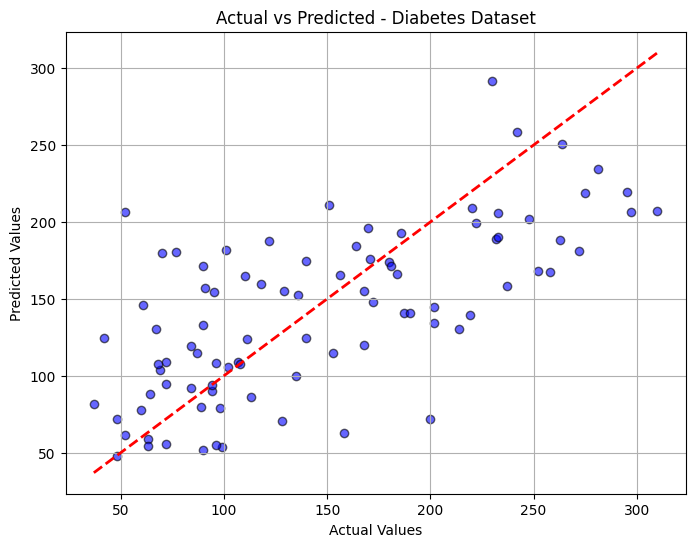

In [18]:
# Step 8: Scatter plot for Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Diabetes Dataset")
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [17]:
# Load dataset
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [18]:
# Convert to binary classification: 1 if above median, 0 if below
median_target = df['target'].median()
df['target_binary'] = (df['target'] > median_target).astype(int)

In [19]:
 #Features & target
X = df.drop(columns=['target', 'target_binary'])
y = df['target_binary']


In [20]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
# Predict
y_pred = model.predict(X_test)

In [23]:
# Accuracy and report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [24]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

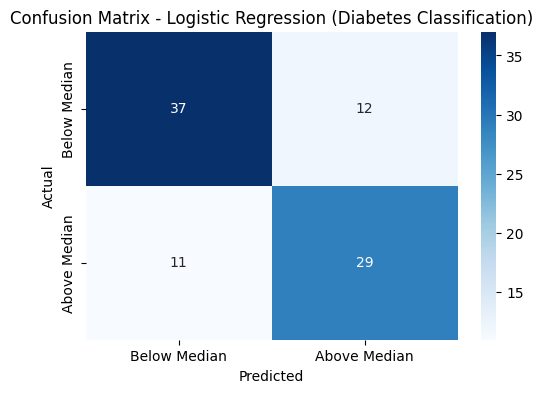

(0.7415730337078652,
 '              precision    recall  f1-score   support\n\n           0       0.77      0.76      0.76        49\n           1       0.71      0.72      0.72        40\n\n    accuracy                           0.74        89\n   macro avg       0.74      0.74      0.74        89\nweighted avg       0.74      0.74      0.74        89\n')

In [25]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Median', 'Above Median'],
            yticklabels=['Below Median', 'Above Median'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Diabetes Classification)')
plt.show()

accuracy, report


In [2]:

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print("Diabetes dataset keys:", diabetes.keys())


Diabetes dataset keys: dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
diabetes = load_diabetes()
X = diabetes.data
y = (diabetes.target > diabetes.target.mean()).astype(int)  # Convert to binary

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
log_reg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Train models
log_reg.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Accuracy scores
acc_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb)
}

# Plot
plt.figure(figsize=(6, 4))
plt.bar(acc_scores.keys(), acc_scores.values(), color=['blue', 'green', 'orange'])
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Step 2: Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Step 4: Predictions & evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 5: Feature importance visualization
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance from Logistic Regression")
plt.gca().invert_yaxis()
plt.show()

# Step 6: Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
 #Step 1: Load dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target


In [16]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
# Step 2: Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

# Step 3: Train model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [12]:
# Step 4: Predictions & evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [13]:
# Step 5: Feature importance visualization
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)


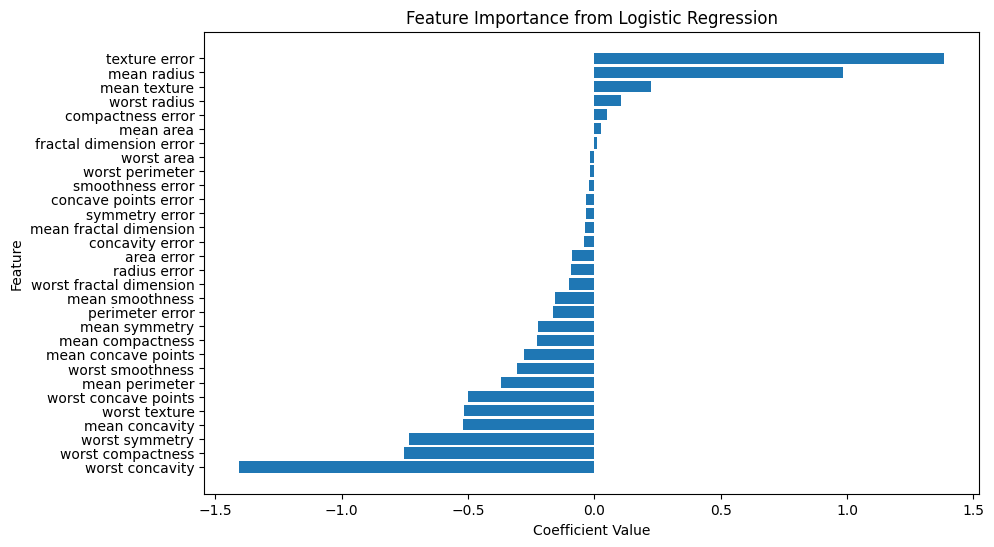

In [14]:

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance from Logistic Regression")
plt.gca().invert_yaxis()
plt.show()

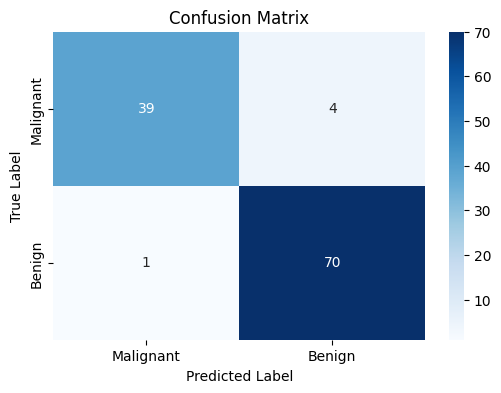

In [15]:
# Step 6: Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()